# CPSC222 Final Project - Analyzing Spotify Data

CPSC 223 Section 01

12/13/2022

Sam Hopper, Manny Uzoma

Within this project, we are going to be analyzing the diferences in our spotify datasets. Moreover, we are going to attempt to train a machine learning model to predict the differences in our listening history.

## Introduction
1. The domain we are researching is a Spotify dataset.
1. We colleced CSV files of the data from Spotify.
1. Tables
    * Data was automatically collected using the Spotify Developer portal.
    * Each table has 4 instances, a date, artist name, track name, and miliseconds played.
1. Attributes:
    * "endTime": cardinal date and time in string
    * "artistName": the name of the artist in string format
    * "trackName": name of the track as a string
    * "msPlayed": amount of time played (in miliseconds) as a integer
1. We are classifying the artist name and the miliseconds played in the dataset.
1. The primary potential impact on our results is us, being the stakeholders, as we will be demonstrating the resources learned from class in real world applications.

## Data Analysis
1. Cleaning was unneccessary as there were no missing values within this dataset, unless counting converting json file to CSV format.
2. Data preperation and aggregation, had to search and group artist names to the respective miliseconds played.


We begin by creating the dataframes and importing the necessary libraries needed. Primarily, we will use pandas to begin sorting our data into a dataframe object.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv("project_midterm_part.csv")
artist_name_df = df.groupby("artistName")

manny_df = pd.read_csv("StreamingHistory1.csv")
manny_artist_name_df = manny_df.groupby("artistName")

#### Beginning Visualizations - Aggregating the dataset

Grouping through each of our five chosen artists and splitting into series to obtain the sums of each.

In [11]:
artist_df = artist_name_df.get_group("Kanye West")
artist_ser = artist_df["msPlayed"]
manny_df1 = manny_artist_name_df.get_group("Kanye West")
artist_ser11 = manny_df1["msPlayed"]

artist_df = artist_name_df.get_group("Mac Miller")
artist_ser2 = artist_df["msPlayed"]
manny_df1 = manny_artist_name_df.get_group("Mac Miller")
artist_ser22 = manny_df1["msPlayed"]

artist_df = artist_name_df.get_group("Drake")
artist_ser3 = artist_df["msPlayed"]
manny_df1 = manny_artist_name_df.get_group("Drake")
artist_ser33 = manny_df1["msPlayed"]

artist_df = artist_name_df.get_group("SZA")
artist_ser4 = artist_df["msPlayed"]
manny_df1 = manny_artist_name_df.get_group("SZA")
artist_ser44 = manny_df1["msPlayed"]

artist_df = artist_name_df.get_group("Billie Eilish")
artist_ser5 = artist_df["msPlayed"]
manny_df1 = manny_artist_name_df.get_group("Billie Eilish")
artist_ser55 = manny_df1["msPlayed"]

Beginning of visualization by identifying each Manny and I's X and Y plot labels and additionally creating the sum of the series for each to find the total amount of time listened for each artist. Moreover, I have a loop that intuitively goes through each instance of the series, which were in miliseconds and now minutes by dividing by 60,000.

In [12]:
x = ["Kanye West", "Mac Miller", "Drake", "SZA", "Billie Eilish"]
y = [int(artist_ser.sum()), int(artist_ser2.sum()), int(artist_ser3.sum()), int(artist_ser4.sum()), int(artist_ser5.sum())]

x1 = ["Kanye West", "Mac Miller", "Drake", "SZA", "Billie Eilish"]
y1 = [int(artist_ser11.sum()), int(artist_ser22.sum()), int(artist_ser33.sum()), int(artist_ser44.sum()), int(artist_ser55.sum())]

# finding the mean amount of time listened
mean_listening_time_ser = df.iloc[:,3]
test_statistic = mean_listening_time_ser.mean() / 60000

#print(y[0])
for i in range(len(y)):
    #print(i)
    y[i] = y[i] / 60000
    y1[i] = y1[i] / 60000

"""
for i in y:
    print(i)
"""

'\nfor i in y:\n    print(i)\n'

### Visualization of Sam Spotify listening history dataset

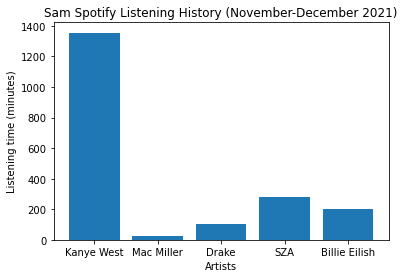

In [13]:
plt.ylabel("Listening time (minutes)")
plt.xlabel("Artists")
plt.title("Sam Spotify Listening History (November-December 2021)")
plt.bar(x,y)
plt.show()

#### Visualization of Manny Spotify listening history dataset

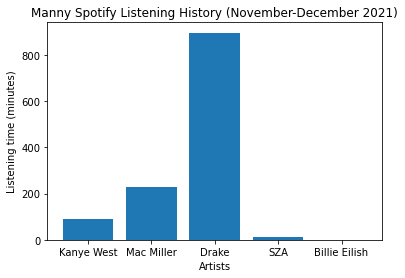

In [14]:
plt.ylabel("Listening time (minutes)")
plt.xlabel("Artists")
plt.title("Manny Spotify Listening History (November-December 2021)")
plt.bar(x1, y1)
plt.show()

### Visualization of both datasets

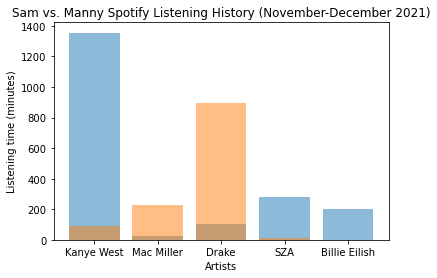

In [15]:
plt.ylabel("Listening time (minutes)")
plt.xlabel("Artists")
plt.title("Sam vs. Manny Spotify Listening History (November-December 2021)")
plt.bar(x, y, alpha=0.5)
plt.bar(x1, y1, alpha=0.5)
plt.show()

* Primary takeaways forom this graph: I listen to significantly more Kanye West than Manny listens to Drake. But we can test this using hypothesis testing:

### One Sample, One-tailed test for Sam's Spotify Data

#### Null and alternative hypothesis:

$H_0$: $\mu \le \mu _2$



$H_1$: $\mu > \mu _2$

#### Level of significance:

$\alpha = 0.05$ 

#### Appropriate test statistic:

$t = \frac{\overline{x} - \mu}{s / \sqrt(n)}$

### Formulate decision rule:

* If t-computed is > 1.708, then reject $H_0$

* If t-computed is <= 1.708, then Do Not Reject $H_0$

In [16]:
t_computed, p_val = stats.ttest_1samp(y, test_statistic)

p_val /= 2 # because one tailed
print(t_computed, p_val)
alpha = 0.05
if p_val < alpha:
    print("reject H0")
else:
    print("DO NOT reject H0")

1.602319095027814 0.09217244169158147
DO NOT reject H0


We can see that the p-value for this test is 0.9, which means it is a close p-value to the original target. Moreover, we have a positive t-computed value which states that the mean of the sample taken is greater than the mean of the hypothesized population. However, since the null hypothesis is rejected, there isn't evidence that supports there is more time listening to these artists than all the artists in the dataset. 

An interesting observation about this is that we can notice that I enjoy exploring music and listening to various artists instead of the same artist repeatedly.

### One Sample, One-tailed test for Manny's Spotify Data

In [17]:
t_computed, p_val = stats.ttest_1samp(y1, test_statistic)

p_val /= 2 # because one tailed
print(t_computed, p_val)
alpha = 0.05
if p_val < alpha:
    print("reject H0")
else:
    print("DO NOT reject H0")

# close p-value, positive t-computed means that mean of sample is greater than hypothesized population mean, thus no evidence supporting theres more listening than the mean

1.4532004957950542 0.10991476145397723
DO NOT reject H0


### Two Independent Samples, One-tailed test

In [19]:
t, pval = stats.ttest_ind(y, y1)
# when performing a one tailed test, you need to divide the pval by 2
pval /= 2
print(t, pval)
alpha = 0.05
if p_val < alpha:
    print("reject H0")
else:
    print("DO NOT reject H0")

0.49754738085287564 0.3160943714385194
DO NOT reject H0


## Classification Results

### Manny

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def fill_in_kNN(X_train_normalized, X_test_normalized, y_train, y_test):
    knn_clf = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
    knn_clf.fit(X_train_normalized,  y_train)
    y_predicted = knn_clf.predict(X_test_normalized)
    # print("y predicted:", y_predicted)
    # print("nearest neighbors:", knn_clf.kneighbors(X_test_normalized))

    acc = knn_clf.score(X_test_normalized, y_test)
    print("accuracy:", acc)

### Conclusion

Overall, seeing all the data that we culminated throughout the year, visualized, was fascinating. Albeit, streaming services now provide these stats at the end of each year, comparing them to one another is where the fun is at. Seeing the machine learning model predicting the differences in our listening histories was also thrilling.